In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import scipy

In [2]:
# 1
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (cats vs. dogs)
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [4]:
#2
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [5]:
# Data preprocessing (assumes you have a dataset with cat and dog images)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
!ls

cnn.ipynb					sampleSubmission.csv  train
DeepLearning_LeCunBengioHinton_nature_2015.pdf	test1		      zipped


In [7]:
# Load and augment training data
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Binary labels (0 or 1)
)

# Load validation data
validation_generator = test_datagen.flow_from_directory(
    'test1',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 25000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=200, 
    epochs=10,           
    validation_data=validation_generator,
    validation_steps=50   
)

Epoch 1/10
200/200 [==============================] - 82s 408ms/step - loss: 0.6836 - accuracy: 0.5409
Epoch 2/10
200/200 [==============================] - 103s 513ms/step - loss: 0.6494 - accuracy: 0.6167
Epoch 3/10
200/200 [==============================] - 108s 538ms/step - loss: 0.6333 - accuracy: 0.6411
Epoch 4/10
200/200 [==============================] - 107s 535ms/step - loss: 0.6059 - accuracy: 0.6594
Epoch 5/10
200/200 [==============================] - 108s 541ms/step - loss: 0.5860 - accuracy: 0.6870
Epoch 6/10
200/200 [==============================] - 111s 554ms/step - loss: 0.5629 - accuracy: 0.7047
Epoch 7/10
200/200 [==============================] - 111s 552ms/step - loss: 0.5638 - accuracy: 0.7038
Epoch 8/10
200/200 [==============================] - 108s 539ms/step - loss: 0.5426 - accuracy: 0.7198
Epoch 9/10
200/200 [==============================] - 109s 543ms/step - loss: 0.5409 - accuracy: 0.7280
Epoch 10/10
200/200 [==============================] - 107s 535ms

In [10]:
# Save the trained model
model.save('cat_vs_dog_model.keras')

In [7]:
# Load the saved model
model = tf.keras.models.load_model('cat_vs_dog_model.keras')

In [3]:
%load_ext tensorboard
!rm -rf ./logs/

In [4]:
%tensorboard --logdir logs

In [9]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

1/1 [==============================] - 0s 19ms/step


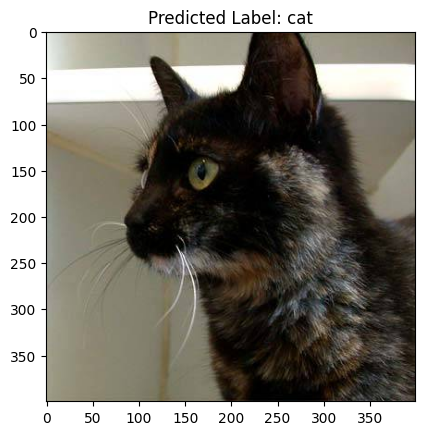

Predicted Probability: 0.22957056760787964


In [23]:
# Load and preprocess the single image you want to test
img_path = 'test1/5.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(150, 150))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)  # Add batch dimension
img /= 255.0  # Normalize pixel values

# Make a prediction using the model
prediction = model.predict(img)

# Get the predicted class label (0 for cat, 1 for dog)
predicted_class = "cat" if prediction[0][0] < 0.5 else "dog"

# Display the image and predicted label
plt.imshow(plt.imread(img_path))
plt.title(f"Predicted Label: {predicted_class}")
plt.show()

print(f"Predicted Probability: {prediction[0][0]}")